## Test 4: Sampling a "volcano".

In [1]:

import sys
import numpy as np

import os

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../Code'))
from Adaptive_Sampler import Adaptive_Sampler




Define our probability distribution function.

In [2]:
# Volcano shape
def ln_prob(p,c):
    return np.log(c[0]*np.exp(-(((p[0]-c[2])**2+(p[1]-c[3])**2)/(2.0*c[4]**2))) - \
                  c[1]*np.exp(-(((p[0]-c[2])**2+(p[1]-c[3])**2)/(2.0*c[5]**2))))


Set up a specific example, and choose some starting points randomly.

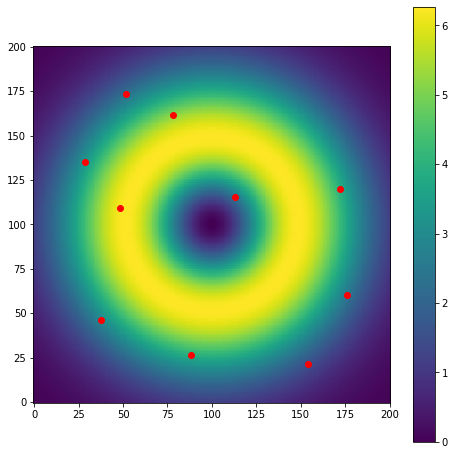

In [32]:
# # height1 height2 x y sigma1 sigma2
c = np.array([30.0,30.0,0.0,0.0,2.0,1.5])


p_guess = np.array([0.0,0.0])


ndim = p_guess.shape[0]

nchains = 10

start = np.empty((nchains,ndim))
for chain in range(nchains):
    start[chain] = p_guess + 8.0 * np.random.rand(ndim) - 4

#
# Make an image of the probability distribution and our starting points
#
x0 = c[2]
y0 = c[3]
h1 = c[0]
h2 = c[1]
w1 = c[4]
w2 = c[5]

x = np.linspace(x0-5,x0+5,201)
y = np.linspace(y0-5,y0+5,201)
X,Y = np.meshgrid(x,y)


Z = h1*np.exp(-((X-x0)**2 + (Y-y0)**2)/(2.0*w1**2)) - h2*np.exp(-((X-x0)**2 + (Y-y0)**2)/(2.0*w2**2))

plt.figure(figsize=(8,8))
plt.imshow(Z,origin='lower')
plt.colorbar()
plt.scatter((start[:,0]+5)*200/10,(start[:,1]+5)*200/10,c='r') 



First we will try sampling using an adaptive step size from the covariance of all chains.


R: [100. 100.]
alpha: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

R: [20.88917496 29.52121828]
alpha: [1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1]

R: [1.04510001 1.05050393]
alpha: [1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21 1.21]

R: [1.00167648 1.00165704]
alpha: [1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331 1.331]

parameter means and uncertainties:
[(-0.032094242434527076, 2.6869626655276946, 2.6229517438571626), (-0.006071163354370024, 2.6592186193611647, 2.683408913016067)]


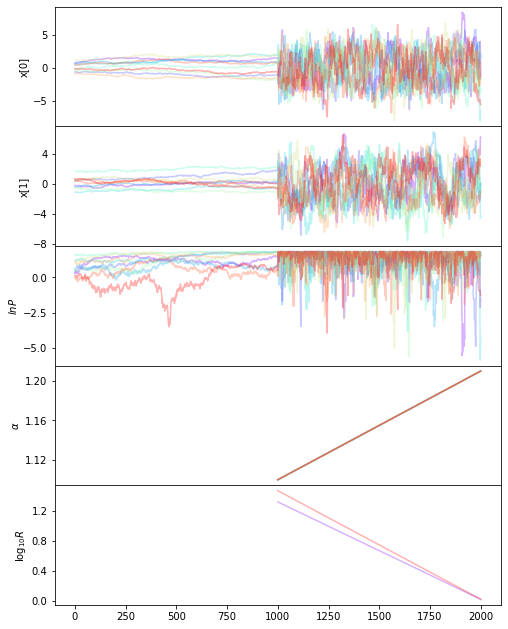

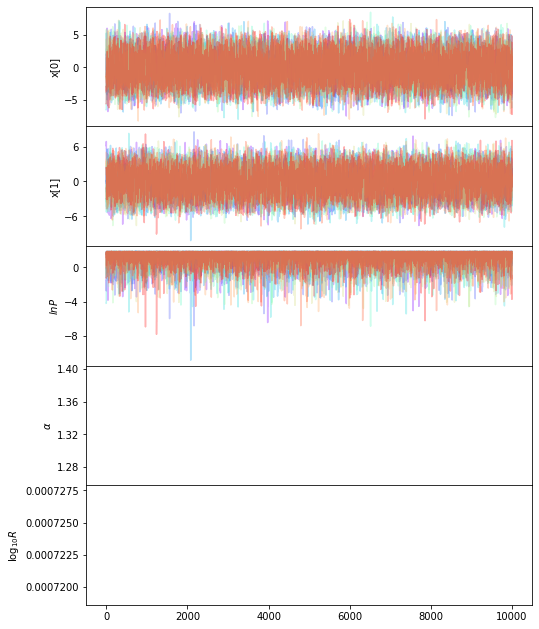

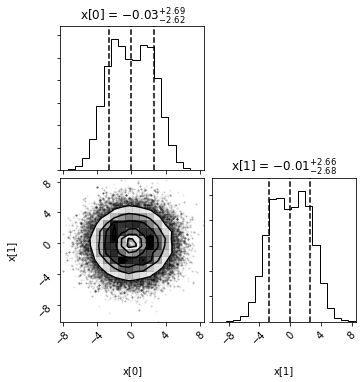

In [36]:

sampler = Adaptive_Sampler(ndim=ndim,nchains=nchains,ln_prob_fn=ln_prob,sigma=0.02*np.ones(ndim),args=(c,))

while np.max(sampler.R) > 1.1:
    sampler.iterate_chains(1000,start=p_guess,plot_progress=False)
    print()
    print('R:',sampler.R)
    print('alpha:', sampler.alpha)

sampler.plot_chains(plot_to_file=False)

nsteps = 10000
sampler.reset()

sampler.iterate_chains(nsteps)
print()
print('R:',sampler.R)
print('alpha:', sampler.alpha)

sampler.plot_chains(plot_to_file=False)

params = list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
                zip(*np.percentile(sampler.chains[-nsteps:,:,:].reshape(nsteps*nchains,ndim), \
                [16, 50, 84], axis=0))))

print()
print('parameter means and uncertainties:')
print(params)

sampler.plot_chain_corner(nsteps=nsteps,plot_to_file=False)




alpha: [1. 1.]

alpha: [1.1 1.1]

alpha: [1.21 1.21]

alpha: [1.331 1.331]

alpha: [1.4641 1.4641]

alpha: [1.61051 1.61051]

alpha: [1.771561 1.771561]

alpha: [1.9487171 1.9487171]

alpha: [2.14358881 2.14358881]

alpha: [2.14358881 2.14358881]


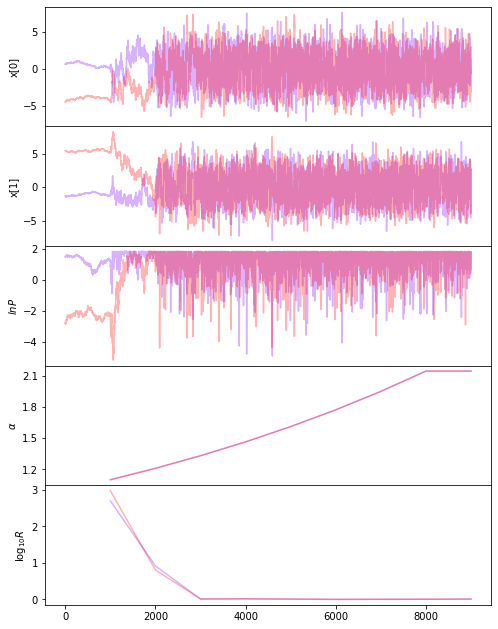

In [27]:

sampler = Adaptive_Sampler(ndim=ndim,nchains=nchains,ln_prob_fn=ln_prob,sigma=0.02*np.ones(ndim),args=(c,))

#
# Note that we use individual chain covariances so cannot use the GR convergence test
#
for i in range(10):
    sampler.iterate_chains(1000,start=start,scale_individual_chains=True,plot_progress=False)
    print()
    print('alpha:',sampler.alpha)

sampler.plot_chains(plot_to_file=False)





parameter means and uncertainties:
[(0.024890132053014824, 2.690018673354049, 2.7172693669982415), (-0.10017351061862811, 2.70840346141022, 2.6607604400855993)]


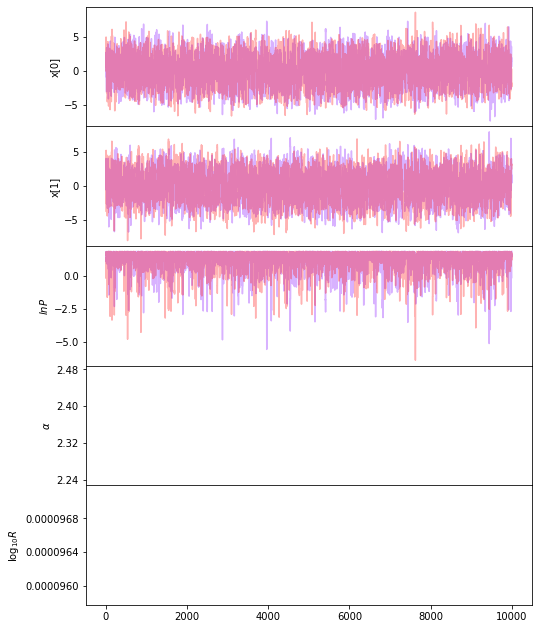

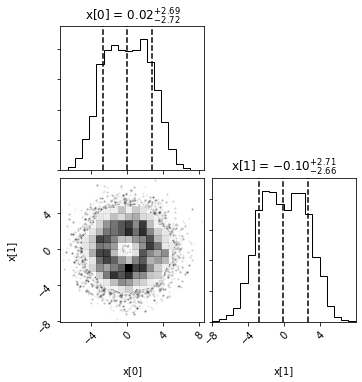

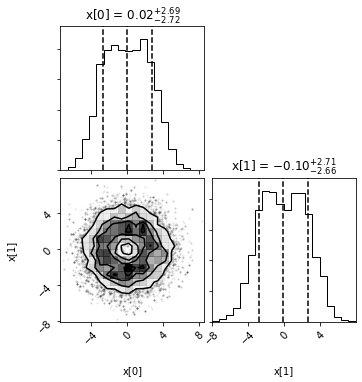

In [28]:
nsteps = 10000
sampler.reset()

sampler.iterate_chains(nsteps,scale_individual_chains=True,plot_progress=False)

sampler.plot_chains(plot_to_file=False)

params = list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), \
            zip(*np.percentile(sampler.chains[-nsteps:,:,:].reshape(nsteps*nchains,ndim), \
            [16, 50, 84], axis=0))))
              
print('parameter means and uncertainties:')
print(params)

              
sampler.plot_chain_corner(nsteps=nsteps,corner_kwargs={"plot_contours":False})
sampler.plot_chain_corner(nsteps=nsteps)


